In [1]:
import csv
import os
import sys
import json
from typing import DefaultDict
import numpy as np
from tqdm import tqdm

split = 'train'

rel_anno_path = '/data/hulab/zcai75/vg8k/seed3/rel_annotations_{}.json'.format(split)
det_anno_path = '/data/hulab/zcai75/vg8k/seed3/detections_{}.json'.format(split)
obj_label_path = '/data/hulab/zcai75/vg8k/seed3/objects.json'
pred_label_path = '/data/hulab/zcai75/vg8k/seed3/predicates.json'
tsv_path = '../../dataset/OFA_data/vg8k/{}.tsv'.format(split)

In [ ]:
if not os.path.exists(os.path.dirname(tsv_path)):
    os.makedirs(os.path.dirname(tsv_path))
with open(rel_anno_path, 'r') as f1, open(det_anno_path, 'r') as f2, \
        open(obj_label_path, 'r') as f3, open(pred_label_path, 'r') as f4, open(tsv_path, 'w') as f5:
    rel_anno = json.load(f1)
    det_anno = json.load(f2)
    obj_label = json.load(f3)
    pred_label = json.load(f4)


In [7]:
display(rel_anno['1.jpg'][0])
display(det_anno['annotations'][0])
print('Object labels:', len(obj_label))
print('Predicate labels:', len(pred_label))

{'predicate': 0,
 'subject': {'category': 362, 'bbox': [338, 530, 119, 393]},
 'object': {'category': 51, 'bbox': [308, 598, 78, 800]}}

{'area': 52608,
 'bbox': [119, 338, 274, 192],
 'category_id': 363,
 'image_id': 1,
 'iscrowd': 0,
 'id': 1}

Object labels: 5330
Predicate labels: 2000


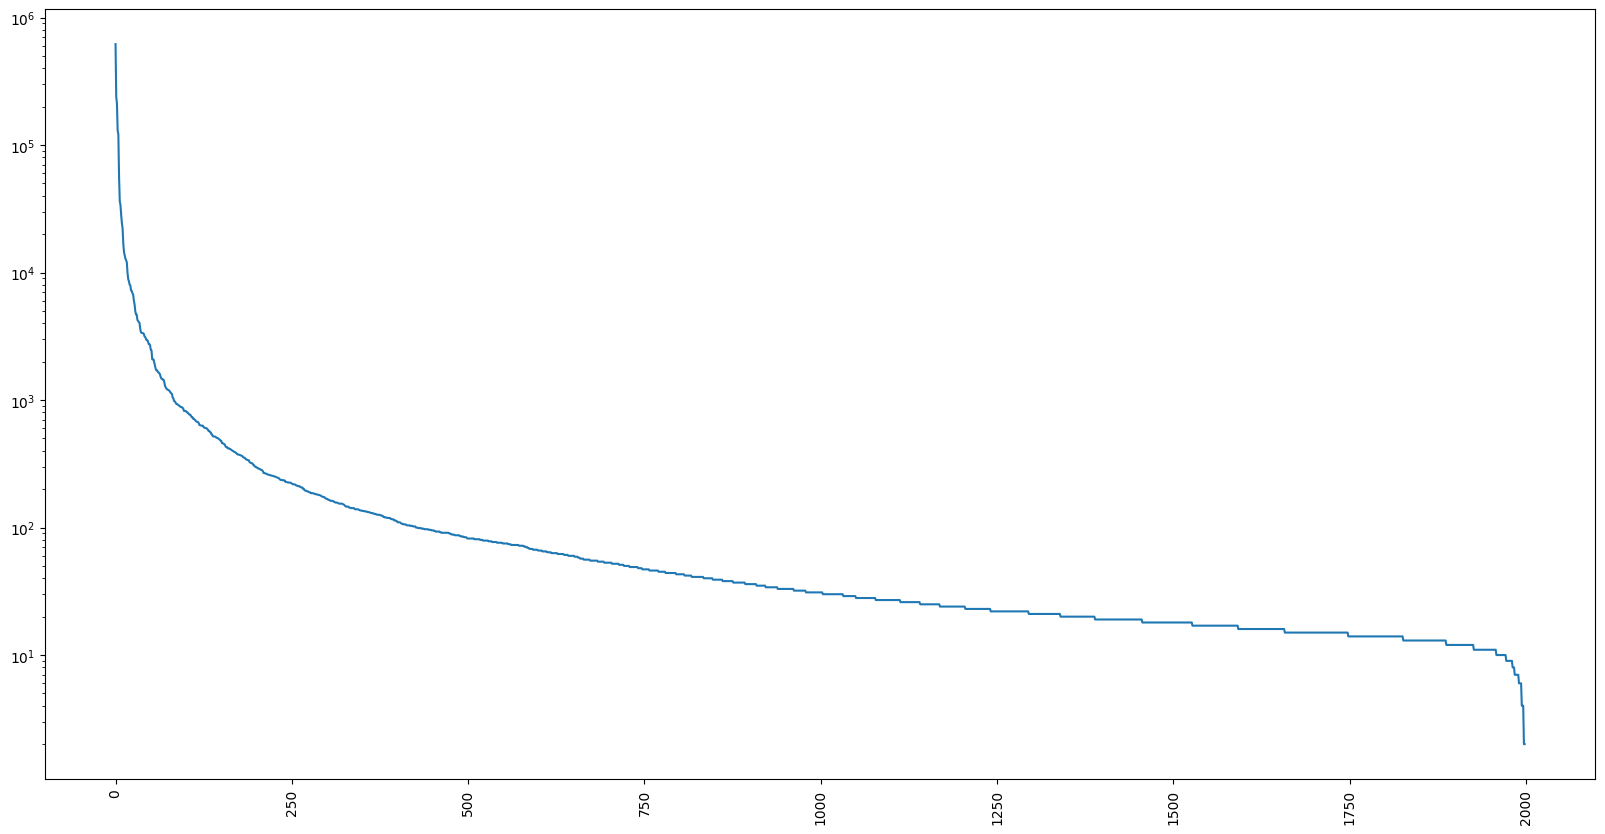

In [12]:
import matplotlib.pyplot as plt

# plot the distribution of predicate labels
counter = DefaultDict(int)
for fn in rel_anno:
    for rel in rel_anno[fn]:
        counter[rel['predicate']] += 1

# sort by value
counter = sorted(counter.items(), key=lambda item: item[1], reverse=True)

# use log scale
plt.figure(figsize=(20, 10))
plt.plot([i[1] for i in counter])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()